Metric: vus
  value: 2
  min: 1
  max: 200

Metric: data_received
  count: 201375555
  rate: 278061.8887768628

Metric: http_req_failed
  passes: 0
  fails: 96583
  thresholds: {'rate<0.01': False}
  value: 0

Metric: vus_max
  min: 200
  max: 200
  value: 200

Metric: http_req_sending
  p(95): 0.049
  avg: 0.025144518186430282
  min: 0.003
  med: 0.013
  max: 20.475
  p(90): 0.038

Metric: data_sent
  count: 7726640
  rate: 10669.041295994735

Metric: iteration_duration
  p(95): 1020.983625
  avg: 1010.2212103269022
  min: 1000.935917
  med: 1004.156583
  max: 2689.798542
  p(90): 1012.0629998000001

Metric: iterations
  count: 96583
  rate: 133.3630161999342

Metric: http_req_tls_handshaking
  med: 0
  max: 0
  p(90): 0
  p(95): 0
  avg: 0
  min: 0

Metric: http_req_waiting
  avg: 9.618116842508632
  min: 0.826
  med: 3.585
  max: 3803.56
  p(90): 11.07
  p(95): 19.562399999999972

Metric: http_req_duration{expected_response:true}
  avg: 9.694020655809016
  min: 0.856
  med: 3.653
  

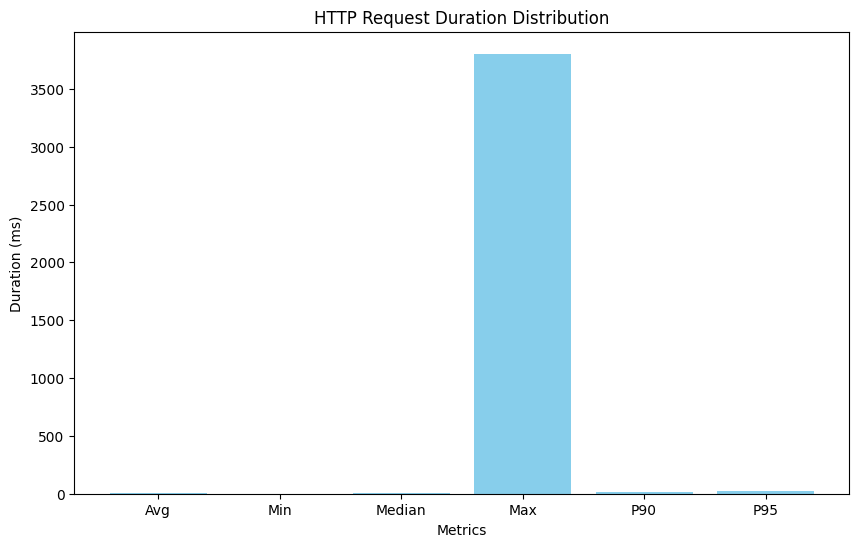

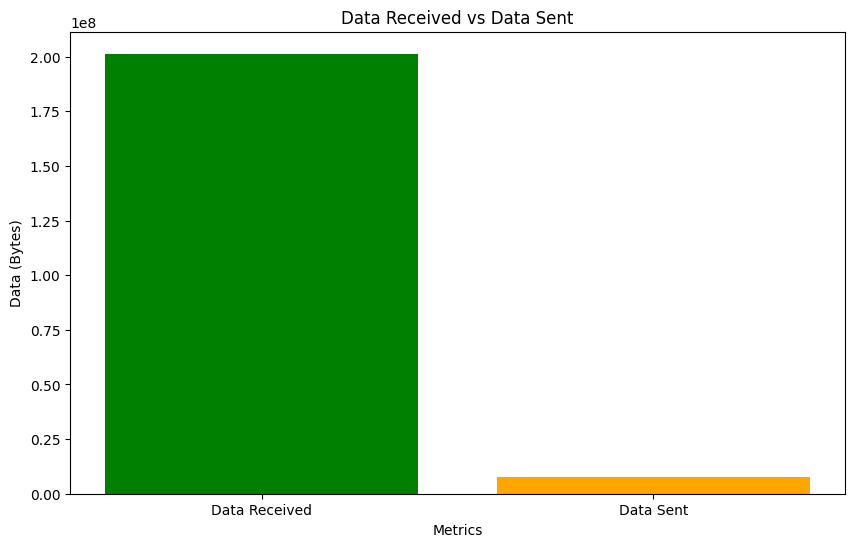

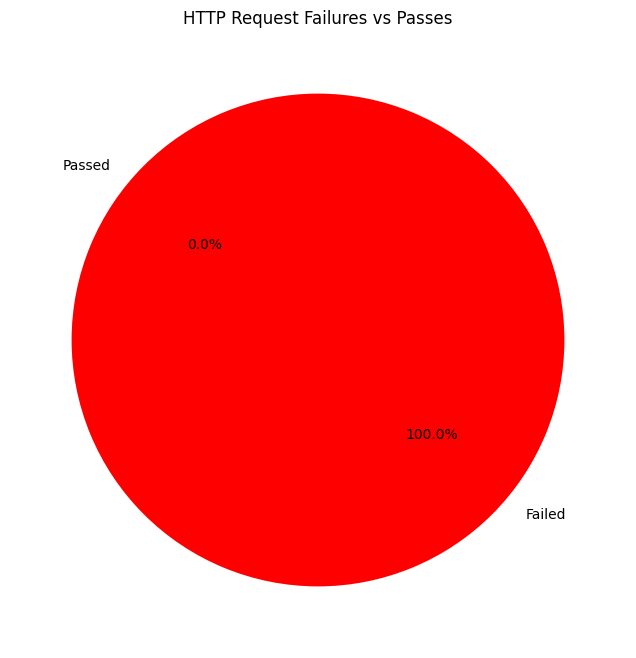

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
file_path = '/content/heavy-load-results.json'  # Update with your Colab file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract metrics
metrics = data.get("metrics", {})

# Helper function to format metric insights
def extract_metric_insights(metric_name, metric_data):
    print(f"Metric: {metric_name}")
    if isinstance(metric_data, dict):
        for key, value in metric_data.items():
            print(f"  {key}: {value}")
    else:
        print(f"  Value: {metric_data}")
    print()

# Iterate through all metrics and display their insights
for metric_name, metric_data in metrics.items():
    extract_metric_insights(metric_name, metric_data)

# Example: Create a DataFrame for detailed analysis
http_req_duration = metrics.get("http_req_duration", {})
if http_req_duration:
    http_req_duration_df = pd.DataFrame([http_req_duration])
    print("HTTP Request Duration:")
    print(http_req_duration_df)

# Highlight key metrics for quick insights
key_metrics = {
    "vus": metrics.get("vus", {}).get("value", "N/A"),
    "max_vus": metrics.get("vus_max", {}).get("value", "N/A"),
    "http_requests": metrics.get("http_reqs", {}).get("count", "N/A"),
    "data_received": metrics.get("data_received", {}).get("count", "N/A"),
    "data_sent": metrics.get("data_sent", {}).get("count", "N/A"),
    "avg_http_req_duration": metrics.get("http_req_duration", {}).get("avg", "N/A"),
    "http_req_failed_rate": metrics.get("http_req_failed", {}).get("thresholds", {}).get("rate<0.01", "N/A"),
}

print("\n--- Key Metrics Insights ---")
for key, value in key_metrics.items():
    print(f"{key}: {value}")

# Visualization
# 1. HTTP Request Duration Distribution
http_req_duration_vals = [
    metrics.get("http_req_duration", {}).get(key, 0)
    for key in ["avg", "min", "med", "max", "p(90)", "p(95)"]
]
http_req_duration_labels = ["Avg", "Min", "Median", "Max", "P90", "P95"]

plt.figure(figsize=(10, 6))
plt.bar(http_req_duration_labels, http_req_duration_vals, color='skyblue')
plt.title('HTTP Request Duration Distribution')
plt.ylabel('Duration (ms)')
plt.xlabel('Metrics')
plt.show()

# 2. Data Received vs Data Sent
data_metrics = [
    metrics.get("data_received", {}).get("count", 0),
    metrics.get("data_sent", {}).get("count", 0)
]
data_labels = ["Data Received", "Data Sent"]

plt.figure(figsize=(10, 6))
plt.bar(data_labels, data_metrics, color=['green', 'orange'])
plt.title('Data Received vs Data Sent')
plt.ylabel('Data (Bytes)')
plt.xlabel('Metrics')
plt.show()

# 3. HTTP Request Failures
http_req_failed = metrics.get("http_req_failed", {}).get("fails", 0)
http_req_passed = metrics.get("http_req_failed", {}).get("passes", 0)

plt.figure(figsize=(8, 8))
plt.pie([http_req_failed, http_req_passed], labels=["Failed", "Passed"], autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('HTTP Request Failures vs Passes')
plt.show()


Throughput graph saved as 'throughput.png'
Latency graph saved as 'latency_percentiles.png'
Error Rate graph saved as 'error_rate.png'


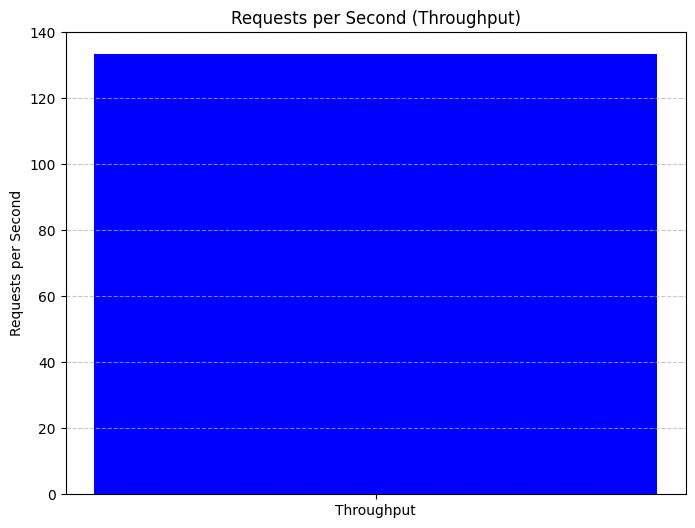

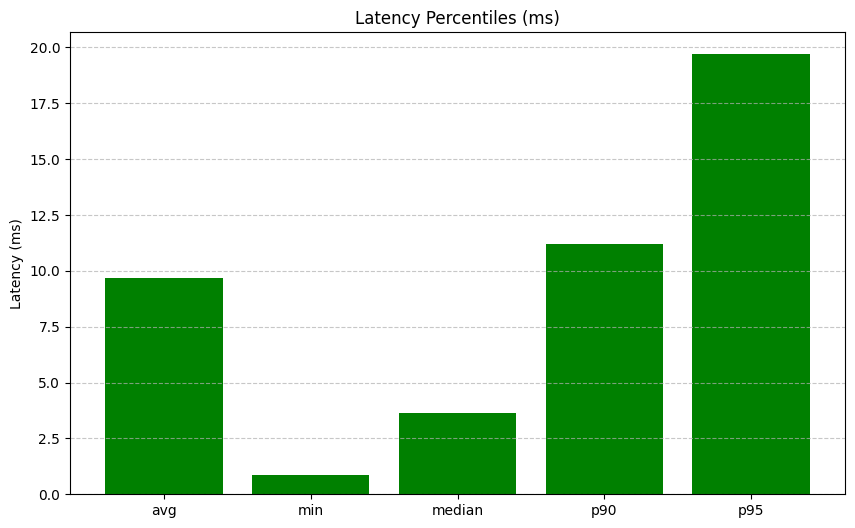

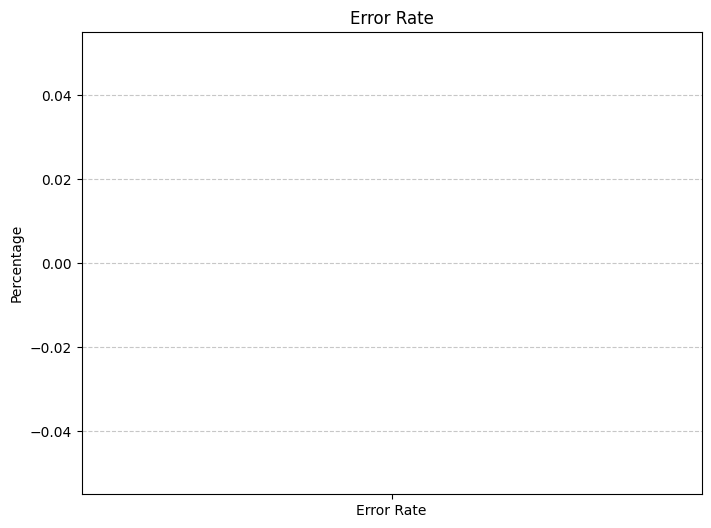

In [ ]:
import json
import matplotlib.pyplot as plt

# Load your JSON file
file_path = "/content/heavy-load-results.json"  # Replace with your JSON file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract metrics
metrics = data['metrics']
throughput = metrics['http_reqs']['rate']
latency = {
    'avg': metrics['http_req_duration']['avg'],
    'min': metrics['http_req_duration']['min'],
    'median': metrics['http_req_duration']['med'],
    'p90': metrics['http_req_duration']['p(90)'],
    'p95': metrics['http_req_duration']['p(95)'],
}
error_rate = metrics['http_req_failed']['value'] * 100  # Convert to percentage

# Plot 1: Throughput
plt.figure(figsize=(8, 6))
plt.bar(['Throughput'], [throughput], color='blue')
plt.title('Requests per Second (Throughput)')
plt.ylabel('Requests per Second')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('throughput.png')
print("Throughput graph saved as 'throughput.png'")

# Plot 2: Latency Percentiles
plt.figure(figsize=(10, 6))
plt.bar(latency.keys(), latency.values(), color='green')
plt.title('Latency Percentiles (ms)')
plt.ylabel('Latency (ms)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('latency_percentiles.png')
print("Latency graph saved as 'latency_percentiles.png'")

# Plot 3: Error Rate
plt.figure(figsize=(8, 6))
plt.bar(['Error Rate'], [error_rate], color='red')
plt.title('Error Rate')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('error_rate.png')
print("Error Rate graph saved as 'error_rate.png'")